# Evaluation of applications
Test if all MSAs are available and of proper size. Load the first cell before executing another cell!

In [1]:
import pandas as pd

# Global parameters
PATH_VAL = "VS_Post_Barnacle"
CSV_FILE = f"VS_final.csv"

## Analysis
Calculate all the PPVs, Gauss Scores and RMSDs for the Validation Set.

In [ ]:
import pandas as pd
from BioHelpers_FABER.cmap import Cmap
from BioHelpers_FABER.visualisation import show_contact_map
import warnings

warnings.filterwarnings("ignore")

noc_fac = 0.5
df = pd.read_csv(f"{PATH_VAL}/{CSV_FILE}", comment="#")

# Calculate PPV and Gauss

ppv_dca = []
ppv_coconet = []
ppv_barnacle_gauss = []
ppv_barnacle_vanilla = []
gauss_dca = []
gauss_coconet = []
gauss_barnacle_gauss = []
gauss_barnacle_vanilla = []
for i, row in df.iterrows():
    cm = Cmap()
    cm.load_native_pdb(
        f"{PATH_VAL}/PDB/fixed/{row.Filename}.pdb",
        row.PDB,
        reference="nearest",
        contact_threshold=10.0,
        start_from_one=row.From_One,
        added_tail=row.Add_Tail,
    )
    print(cm.pdb_id)
    cm.load_contacts_from_restraints(
        f"{PATH_VAL}/Restraints/mfdca/simrna_{row.Filename}_L{noc_fac}.res", "mfdca"
    )
    cm.load_contacts_from_restraints(
        f"{PATH_VAL}/Restraints/coconet/simrna_{row.Filename}_L{noc_fac}.res", "coconet"
    )
    cm.load_contacts_from_restraints(
        f"{PATH_VAL}/Restraints/barnacle_gauss/simrna_{row.Filename}_L{noc_fac}.res",
        "barnacle_gauss",
    )
    cm.load_contacts_from_restraints(
        f"{PATH_VAL}/Restraints/barnacle_vanilla/simrna_{row.Filename}_L{noc_fac}.res",
        "barnacle_vanilla",
    )
    fig, ax = show_contact_map(
        cm, ["mfdca", "coconet", "barnacle_gauss", "barnacle_vanilla"], mark_match=True
    )
    fig.savefig(f"Plots/cm_{cm.pdb_id}.png")
    ppv_dca.append(cm.ppvs["mfdca"])
    ppv_coconet.append(cm.ppvs["coconet"])
    ppv_barnacle_gauss.append(cm.ppvs["barnacle_gauss"])
    ppv_barnacle_vanilla.append(cm.ppvs["barnacle_vanilla"])
    gauss_dca.append(cm.gauss["mfdca"])
    gauss_coconet.append(cm.gauss["coconet"])
    gauss_barnacle_gauss.append(cm.gauss["barnacle_gauss"])
    gauss_barnacle_vanilla.append(cm.gauss["barnacle_vanilla"])

df["PPV_mfdca"] = ppv_dca
df["PPV_coconet"] = ppv_coconet
df["PPV_barnacle_gauss"] = ppv_barnacle_gauss
df["PPV_barnacle_vanilla"] = ppv_barnacle_vanilla
df["GAUSS_mfdca"] = gauss_dca
df["GAUSS_coconet"] = gauss_coconet
df["GAUSS_barnacle_gauss"] = gauss_barnacle_gauss
df["GAUSS_barnacle_vanilla"] = gauss_barnacle_vanilla

Save dataframe:

In [5]:
df.to_csv(f"results.csv", index=False)

Load dataframe:

In [ ]:
df = pd.read_csv(f"results.csv", comment="#")
df["GAUSS_L_mfdca"] = df["GAUSS_mfdca"] / df["L"]
df["GAUSS_L_coconet"] = df["GAUSS_coconet"] / df["L"]
df["GAUSS_L_barnacle_gauss"] = df["GAUSS_barnacle_gauss"] / df["L"]
df["GAUSS_L_barnacle_vanilla"] = df["GAUSS_barnacle_vanilla"] / df["L"]

Create figure for publication:

In [ ]:
from BioHelpers_FABER.cmap import Cmap

cm = Cmap()
cm.load_native_pdb(f"PDB{PATH_SUFFIX}/6ues.pdb", "6ues", reference="nearest")
cm.load_contacts_from_restraints(
    f"Restraints{PATH_SUFFIX}/DCA/simrna_6ues_L0.5.res", "DCA"
)
cm.load_contacts_from_restraints(
    f"Restraints{PATH_SUFFIX}/COCONET/simrna_6ues_L0.5.res", "COCONET"
)
cm.load_contacts_from_restraints(
    f"Restraints{PATH_SUFFIX}/BARNACLE_VANILLA/simrna_6ues_L0.5.res", "BARNACLE"
)

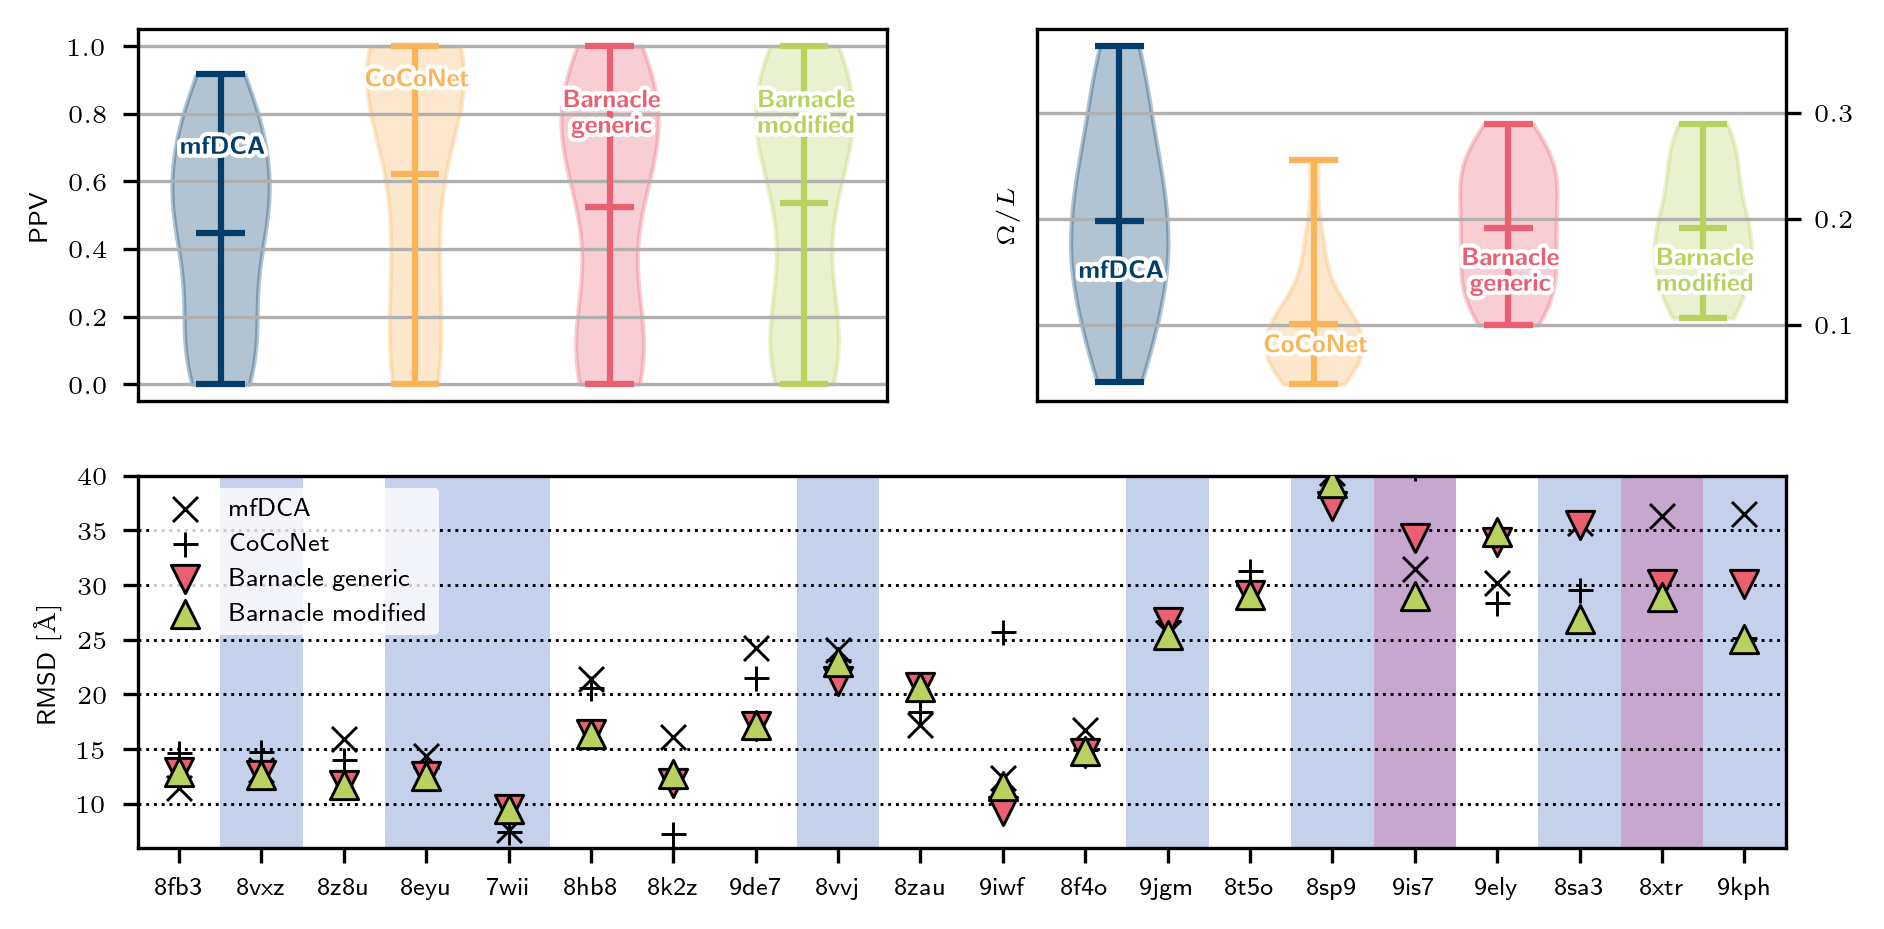

In [71]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.patheffects as pe
import matplotlib

matplotlib.rc("font", family="sans-serif")
matplotlib.rc("font", serif="Helvetica Neue")
matplotlib.rcParams.update({"font.size": 6})
plt.rcParams["text.usetex"] = True
plt.rcParams.update({"figure.dpi": 300})

cmtoinch = 0.3937

fig, axs = plt.subplots(2, 2, figsize=(18 * cmtoinch, 9 * cmtoinch))
face_color_plot = ["#023d6b", "#fab45a", "#eb5f73", "#b9d25f"]
means_color_plot = face_color_plot
plots = []
plots.append(
    axs[0, 0].violinplot(
        [
            df["PPV_mfdca"],
            df["PPV_coconet"],
            df["PPV_barnacle_gauss"],
            df["PPV_barnacle_vanilla"],
        ],
        showmeans=True,
    )
)
plots.append(
    axs[0, 1].violinplot(
        [
            df["GAUSS_L_mfdca"],
            df["GAUSS_L_coconet"],
            df["GAUSS_L_barnacle_gauss"],
            df["GAUSS_L_barnacle_vanilla"],
        ],
        showmeans=True,
    )
)

for plot in plots:
    for c, vp in zip(face_color_plot, plot["bodies"]):
        vp.set_facecolor(c)
        vp.set_edgecolor(c)
    for partname in ("cbars", "cmins", "cmaxes", "cmeans"):
        plot[partname].set_color(means_color_plot)


axs[0, 0].set_xticks([])
axs[0, 1].set_xticks([])
axs[0, 1].yaxis.tick_right()
axs[0, 0].set_ylabel(r"PPV")
axs[0, 1].set_ylabel(r"$\Omega/L$")
axs[0, 0].yaxis.grid(zorder=-1)
axs[0, 1].yaxis.grid(zorder=-1)

axs[0, 0].text(
    1.01,
    0.7,
    r"\textbf{mfDCA}",
    horizontalalignment="center",
    verticalalignment="center",
    c=face_color_plot[0],
    path_effects=[pe.withStroke(linewidth=2, foreground="white")]
)
axs[0, 0].text(
    2.01,
    0.9,
    r"\textbf{CoCoNet}",
    horizontalalignment="center",
    verticalalignment="center",
    c=face_color_plot[1],
    path_effects=[pe.withStroke(linewidth=2, foreground="white")]
)
axs[0, 0].text(
    3.01,
    0.8,
    r"\textbf{Barnacle}"+"\n"+r"\textbf{generic}",
    horizontalalignment="center",
    verticalalignment="center",
    c=face_color_plot[2],
    path_effects=[pe.withStroke(linewidth=2, foreground="white")]
)
axs[0, 0].text(
    4.01,
    0.8,
    r"\textbf{Barnacle}"+"\n"+r"\textbf{modified}",
    horizontalalignment="center",
    verticalalignment="center",
    c=face_color_plot[3],
    path_effects=[pe.withStroke(linewidth=2, foreground="white")]
)

axs[0, 1].text(
    1.01,
    0.15,
    r"\textbf{mfDCA}",
    horizontalalignment="center",
    verticalalignment="center",
    c=face_color_plot[0],
    path_effects=[pe.withStroke(linewidth=2, foreground="white")]
)
axs[0, 1].text(
    2.01,
    0.08,
    r"\textbf{CoCoNet}",
    horizontalalignment="center",
    verticalalignment="center",
    c=face_color_plot[1],
    path_effects=[pe.withStroke(linewidth=2, foreground="white")]
)
axs[0, 1].text(
    3.01,
    0.15,
    r"\textbf{Barnacle}"+"\n"+r"\textbf{generic}",
    horizontalalignment="center",
    verticalalignment="center",
    c=face_color_plot[2],
    path_effects=[pe.withStroke(linewidth=2, foreground="white")]
)
axs[0, 1].text(
    4.01,
    0.15,
    r"\textbf{Barnacle}"+"\n"+r"\textbf{modified}",
    horizontalalignment="center",
    verticalalignment="center",
    c=face_color_plot[3],
    path_effects=[pe.withStroke(linewidth=2, foreground="white")]
)


juelich_colors = ["#eb5f73", "#b9d25f", "#adbde3", "#af82b9", "#023d6b", "#fab45a"]

markersize = 36
linewidths = 0.7

df = df[df["RMSD_mfdca"] < 90.0]
df.sort_values(by=["L"], inplace=True)

gs = axs[1, 0].get_gridspec()

axs[1, 0].remove()
axs[1, 1].remove()

lower_ax = fig.add_subplot(gs[1, :])

lower_ax.grid(axis="y", zorder=-5, linewidth=0.7, c="black", linestyle=":")
lower_ax.scatter(
    df["PDB"],
    df["RMSD_mfdca"],
    marker="x",
    s=markersize,
    linewidths=linewidths,
    label="mfDCA",
    c="black",
    zorder=3,
)
lower_ax.scatter(
    df["PDB"],
    df["RMSD_coconet"],
    marker="+",
    s=markersize,
    linewidths=linewidths,
    label="CoCoNet",
    c="black",
    zorder=3,
)
lower_ax.scatter(
    df["PDB"],
    df["RMSD_barnacle_vanilla"],
    marker="v",
    s=markersize + 10,
    linewidths=linewidths,
    label="Barnacle generic",
    c=juelich_colors[0],
    edgecolors="black",
    zorder=3,
)
lower_ax.scatter(
    df["PDB"],
    df["RMSD_barnacle_gauss"],
    marker="^",
    s=markersize + 10,
    linewidths=linewidths,
    label="Barnacle modified",
    c=juelich_colors[1],
    edgecolors="black",
    zorder=3,
)


leg = lower_ax.legend(loc="upper left")
leg.get_frame().set_linewidth(0.0)


lower_ax.set_ylabel("RMSD $[\mathrm{\AA}]$")
lower_ax.set_ylim(6, 40)


rects = []
count = 0  # Necessary, because we exclude molecules
for i, row in df.iterrows():
    patch_func = lambda x: patches.Rectangle(
        (-0.5 + count, lower_ax.get_ylim()[0]),
        1,
        lower_ax.get_ylim()[1] - lower_ax.get_ylim()[0],
        facecolor=x,
        zorder=-3,
        alpha=0.7,
    )
    if row.Remark == "complex":
        lower_ax.add_patch(patch_func(juelich_colors[3]))
    elif row.Remark == "bound" or row.Remark == "dimer":
        lower_ax.add_patch(patch_func(juelich_colors[2]))
    elif row.Remark == "dynamic":
        lower_ax.add_patch(patch_func(juelich_colors[0]))
    count += 1

lower_ax.set_xlim(-0.5, count - 0.5)
plt.savefig("application.png", transparent=True, dpi=300)
plt.show()

Export Table for SI:

In [ ]:
df = pd.read_csv(PATH_VAL + "/" + CSV_FILE, comment="#")
print(
    df[["PDB", "Family", "L", "Meff"]].to_latex(
        index=False, float_format="{:.1f}".format
    )
)

\begin{tabular}{llrr}
\toprule
PDB & Family & L & Meff \\
\midrule
7wii & RF02977 & 50 & 2.6 \\
7yga & RF00028 & 393 & 9.0 \\
8eyu & RF00168 & 49 & 3.1 \\
8f4o & RF00059 & 83 & 67.5 \\
8fb3 & RF00522 & 34 & 5.8 \\
8hb8 & RF01079 & 55 & 2.0 \\
8k2z & RF01684 & 57 & 4.6 \\
8sa3 & RF00174 & 210 & 294.5 \\
8sp9 & RF00386 & 153 & 4.0 \\
8t5o & RF00163 & 124 & 4.0 \\
8vvj & RF01750 & 64 & 53.5 \\
8vxz & RF03493 & 36 & 2.0 \\
8xtr & RF03300 & 219 & 2.0 \\
8z8u & RF01136 & 41 & 2.0 \\
8zau & RF00419 & 69 & 7.9 \\
9de7 & RF00250 & 58 & 1.9 \\
9ely & RF03072 & 205 & 51.8 \\
9is7 & RF03013 & 153 & 9.1 \\
9iwf & RF00167 & 69 & 44.7 \\
9jgm & RF00176 & 105 & 2.0 \\
9kph & RF02933 & 255 & 14.8 \\
\bottomrule
\end{tabular}

